In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [20]:
df = pd.read_csv("/customer_purchase_dataset.csv")
print(df.head())
X = df.drop(columns=['Purchased']).values
y = df['Purchased'].values
a=df.iloc[:,:-1]
b=df.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Age  Salary  Purchased
0   56   24000          0
1   46   90588          1
2   32  121042          1
3   60  113610          0
4   25  140420          0


In [21]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [24]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.83
Precision: 0.7446808510638298
Recall: 0.875
F1 Score: 0.8045977011494253
Confusion Matrix:
 [[48 12]
 [ 5 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85        60
           1       0.74      0.88      0.80        40

    accuracy                           0.83       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.84      0.83      0.83       100



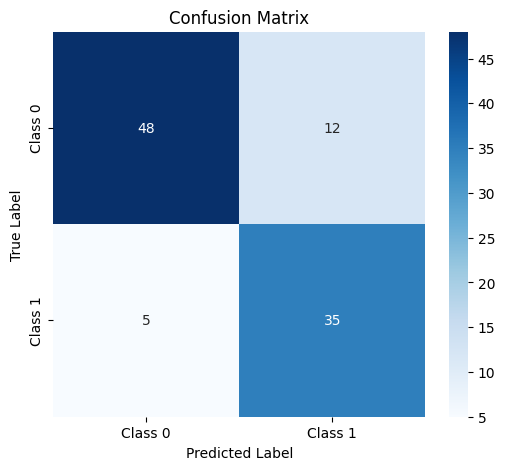

In [25]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()